# PlacesAudio data preview
-----

This notebook inspects the PlacesAudio400k dataset. At the time of writing, data is in teamwork under the path `/teamwork/t40511_asr/c/PlacesAudio400k/PlacesAudio_400k_distro/`.
Originally the data is downloaded from https://groups.csail.mit.edu/sls/downloads/placesaudio/.

## JSON files

Read JSON files in metadata folder.

In [1]:
import json
from IPython.display import JSON, Image, Audio

metadata_path = "/teamwork/t40511_asr/c/PlacesAudio400k/PlacesAudio_400k_distro/metadata"
train_json = "train.json"
val_json = "val.json"
lists = ["lists/nips_2016_train_uttids", "lists/nips_2016_val_uttids", "lists/acl_2017_train_uttids", "lists/acl_2017_val_uttids"]

The number of image/caption pairs for training and validation.

In [2]:
with open(metadata_path + "/" + train_json) as f:
    data_train = json.load(f)

print("Number of elements in train.json:", len(data_train['data']))

Number of elements in train.json: 402385


In [3]:
with open(metadata_path + "/" + val_json) as f:
    data_val = json.load(f)
    
print("Number of elements in val.json:", len(data_val['data']))

Number of elements in val.json: 1000


A sample item from the training data.

In [4]:
JSON(data_train['data'][1])

<IPython.core.display.JSON object>

The image in question (at the time of writing copied from Triton, path: `/scratch/cs/imagedb/picsom/databases/places/download/Images`)

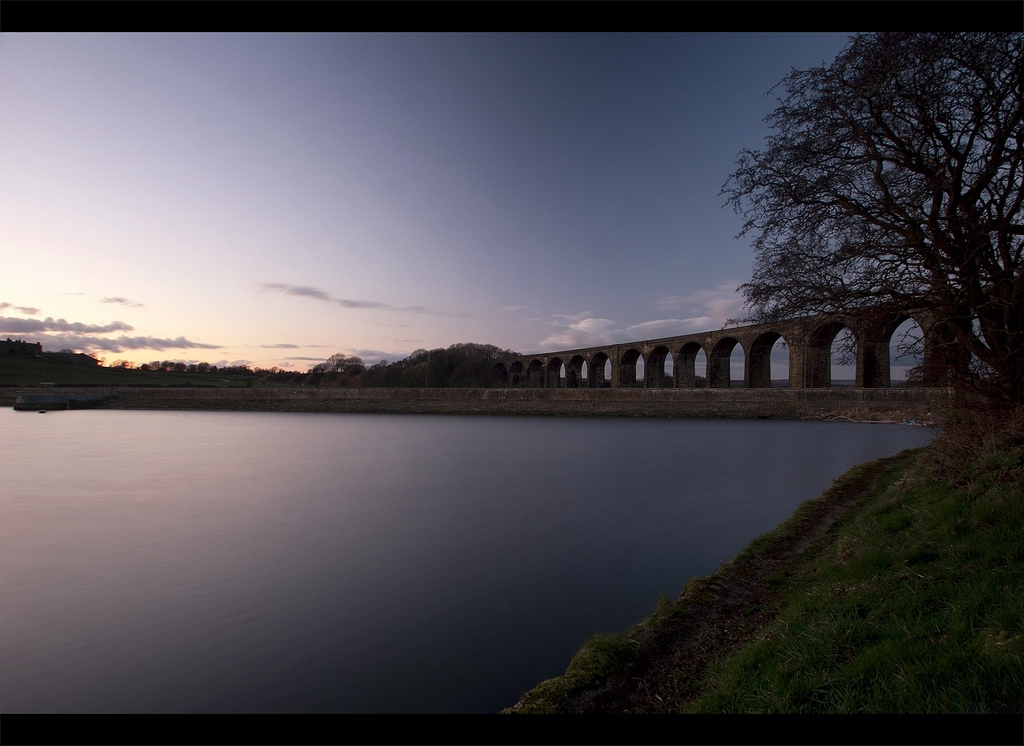

In [5]:
Image('gsun_b2c654d7066748e3274693f8a870c799.jpg')


In [6]:
Audio('utterance_232878.wav')

## NIPS and ACL data splits

Dataset sizes:

In [7]:
from subprocess import Popen, PIPE

for l in lists:
    name = metadata_path + "/" + l
    p = Popen(['wc', '-l', name], stdout=PIPE,
                                             stderr=PIPE)
    result, err = p.communicate()
    if p.returncode != 0:
        print("Error: ", err)
    else:
        print("Success: ", result)


Success:  b'116111 /teamwork/t40511_asr/c/PlacesAudio400k/PlacesAudio_400k_distro/metadata/lists/nips_2016_train_uttids\n'
Success:  b'1000 /teamwork/t40511_asr/c/PlacesAudio400k/PlacesAudio_400k_distro/metadata/lists/nips_2016_val_uttids\n'
Success:  b'214585 /teamwork/t40511_asr/c/PlacesAudio400k/PlacesAudio_400k_distro/metadata/lists/acl_2017_train_uttids\n'
Success:  b'1000 /teamwork/t40511_asr/c/PlacesAudio400k/PlacesAudio_400k_distro/metadata/lists/acl_2017_val_uttids\n'
